In [2]:
import pandas as pd

In [1]:
pip list

Package                 Version
----------------------- -----------
appnope                 0.1.4
asttokens               3.0.0
comm                    0.2.2
debugpy                 1.8.14
decorator               5.2.1
executing               2.2.0
ipykernel               6.29.5
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.8.1
matplotlib-inline       0.1.7
nest-asyncio            1.6.0
numpy                   2.2.5
packaging               25.0
pandas                  2.2.3
parso                   0.8.4
pexpect                 4.9.0
pip                     25.0.1
platformdirs            4.3.8
prompt_toolkit          3.0.51
psutil                  7.0.0
ptyprocess              0.7.0
pure_eval               0.2.3
Pygments                2.19.2
python-dateutil         2.9.0.post0
pytz                    2025.2
pyzmq                   27.0.0
six                     1.17.0
stack-data        

In [4]:
housing_df = pd.read_csv("housing_data.csv")
transport_df = pd.read_csv("tranist_data.csv") 

ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 6


In [5]:
housing_df = pd.read_csv("housing_data.csv")
transport_df = pd.read_csv("tranist_data.csv") 

ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 6


In [6]:
import pandas as pd

# Read the file, skipping the messy top rows
df_raw = pd.read_csv("housing_data.csv", header=None, skiprows=3)

# Rename the columns manually
df_raw.columns = ['Type', 'January 2025', 'February 2025', 'March 2025', 'April 2025', 'May 2025']

# Set 'Type' as index (optional)
df_raw.set_index('Type', inplace=True)

print(df_raw)


ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 6


In [7]:
import pandas as pd
import csv

# Read raw lines, skipping empty/malformed ones
with open("housing_data.csv", "r") as file:
    lines = [line for line in file.readlines() if line.count(",") >= 5]

# Load into pandas manually
from io import StringIO
clean_text = "".join(lines[2:])  # Skip first 2 rows (junk)
df = pd.read_csv(StringIO(clean_text), header=None)

# Rename columns manually
df.columns = ['Type', 'January 2025', 'February 2025', 'March 2025', 'April 2025', 'May 2025']

# Set index (optional)
df.set_index('Type', inplace=True)

# Remove "E" from estimate values
df = df.applymap(lambda x: str(x).replace('E', '')).astype(float)

# Display the cleaned DataFrame
print(df)


/var/folders/k0/_3c43bj51n749pc1sys7q3gm0000gn/T/ipykernel_16277/3733087374.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('E', '')).astype(float)


ValueError: could not convert string to float: 'Index, 201612=100'

In [8]:
import pandas as pd
from io import StringIO

# Read and filter file
with open("housing_data.csv", "r") as file:
    lines = [line for line in file.readlines() if line.count(",") >= 5]

# Skip top 3 lines (junk) and keep the rest
clean_text = "".join(lines[3:])  # Skip 3 lines now
df = pd.read_csv(StringIO(clean_text), header=None)

# Rename columns
df.columns = ['Type', 'January 2025', 'February 2025', 'March 2025', 'April 2025', 'May 2025']

# Set index
df.set_index('Type', inplace=True)

# Clean numeric values: remove 'E' and convert to float
def clean_cell(value):
    try:
        return float(str(value).replace('E', ''))
    except ValueError:
        return None  # or float('nan')

df = df.applymap(clean_cell)

# Show result
print(df)


                        January 2025  February 2025  March 2025  April 2025  \
Type                                                                          
Total (house and land)         124.4          124.5       124.5       124.0   
House only                     127.3          127.5       127.4       126.7   
Land only                      117.2          117.2       117.3       117.3   
2                                NaN            NaN         NaN         NaN   

                        May 2025  
Type                              
Total (house and land)     123.7  
House only                 126.2  
Land only                  117.4  
2                            NaN  


/var/folders/k0/_3c43bj51n749pc1sys7q3gm0000gn/T/ipykernel_16277/308331773.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_cell)


In [9]:
import pandas as pd
from io import StringIO

# Read raw lines from the transit file
with open("Tranist.data.csv", "r") as file:
    lines = [line for line in file.readlines() if line.count(",") >= 5]

# Skip top 7 rows (junk) and keep the rest
clean_text = "".join(lines[7:])

# Load into DataFrame
df_transit = pd.read_csv(StringIO(clean_text), header=None)

# Rename columns
df_transit.columns = ['Type', 'August 2016', 'September 2016', 'October 2016', 'November 2016', 'December 2016']

# Drop empty rows if any
df_transit.dropna(subset=["Type"], inplace=True)

# Set index
df_transit.set_index("Type", inplace=True)

# Convert all values to float (if needed)
def clean_transit_value(val):
    try:
        return float(str(val).replace('E', '').strip())
    except:
        return None

df_transit = df_transit.applymap(clean_transit_value)

# Show result
print(df_transit)


FileNotFoundError: [Errno 2] No such file or directory: 'Tranist.data.csv'

In [10]:
with open("transit_data.csv", "r") as file:
    lines = [line for line in file.readlines() if line.count(",") >= 5]

clean_text = "".join(lines[7:])

df_transit = pd.read_csv(StringIO(clean_text), header=None)

df_transit.columns = ['Type', 'August 2016', 'September 2016', 'October 2016', 'November 2016', 'December 2016']

df_transit.dropna(subset=["Type"], inplace=True)

df_transit.set_index("Type", inplace=True)

def clean_transit_value(val):
    try:
        return float(str(val).replace('E', '').strip())
    except:
        return None

df_transit = df_transit.applymap(clean_transit_value)

print(df_transit)


EmptyDataError: No columns to parse from file

In [11]:
with open("transit_data.csv", "r") as file:
    all_lines = file.readlines()

print(f"Total lines in file: {len(all_lines)}")

# Print first 15 lines for inspection
for i, line in enumerate(all_lines[:15]):
    print(f"Line {i}: {line.strip()} (commas: {line.count(',')})")

# Now filter lines with 5 or more commas (to capture table rows)
filtered_lines = [line for line in all_lines if line.count(",") >= 5]
print(f"Lines with 5+ commas: {len(filtered_lines)}")

# Print first 10 filtered lines to check
for i, line in enumerate(filtered_lines[:10]):
    print(f"Filtered Line {i}: {line.strip()}")


Total lines in file: 25
Line 0: ﻿"Large urban transit statistics, revenue and passenger trips based on 10 major Canadian urban transit operators (x 1,000,000) 1" (commas: 3)
Line 1: "Frequency: Monthly" (commas: 0)
Line 2: "Table: 23-10-0078-01 (formerly CANSIM 408-0004)" (commas: 0)
Line 3: "Release date: 2017-05-05" (commas: 0)
Line 4: "Geography: Canada" (commas: 0)
Line 5: "" (commas: 0)
Line 6: "" (commas: 0)
Line 7:  (commas: 0)
Line 8: "Geography","Canada",,,, (commas: 5)
Line 9: "Urban transit","August 2016","September 2016","October 2016","November 2016","December 2016" (commas: 5)
Line 10: ,"Dollars",,,, (commas: 5)
Line 11: "Total urban transit revenue, excluding subsidies (dollars)","277.0","327.8","300.5","302.3","298.1" (commas: 6)
Line 12: ,"Number",,,, (commas: 5)
Line 13: "Total urban transit passenger trips (number)","120.3","151.9","142.9","145.5","141.5" (commas: 5)
Line 14:  (commas: 0)
Lines with 5+ commas: 6
Filtered Line 0: "Geography","Canada",,,,
Filtered Line

In [12]:
import pandas as pd
from io import StringIO

with open("transit_data.csv", "r") as file:
    lines = file.readlines()

# Relevant lines are lines 9, 11, 13 (0-indexed)
data_lines = [lines[9], lines[11], lines[13]]

# Combine lines into CSV text for pandas to read
csv_text = "".join(data_lines)

# Read into DataFrame with first row as header
df_transit = pd.read_csv(StringIO(csv_text))

# Rename first column to 'Type'
df_transit.rename(columns={df_transit.columns[0]: 'Type'}, inplace=True)

# Set index on 'Type' column
df_transit.set_index('Type', inplace=True)

# Convert all data to float (remove E if any)
def clean_val(val):
    try:
        return float(str(val).replace('E', '').strip())
    except:
        return None

df_transit = df_transit.applymap(clean_val)

print(df_transit)


                                                    August 2016  \
Type                                                              
Total urban transit revenue, excluding subsidie...        277.0   
Total urban transit passenger trips (number)              120.3   

                                                    September 2016  \
Type                                                                 
Total urban transit revenue, excluding subsidie...           327.8   
Total urban transit passenger trips (number)                 151.9   

                                                    October 2016  \
Type                                                               
Total urban transit revenue, excluding subsidie...         300.5   
Total urban transit passenger trips (number)               142.9   

                                                    November 2016  \
Type                                                                
Total urban transit revenue, excluding 

/var/folders/k0/_3c43bj51n749pc1sys7q3gm0000gn/T/ipykernel_16277/1537801078.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_transit = df_transit.applymap(clean_val)


In [13]:
# Save cleaned housing data
df.to_csv("cleaned_housing_data.csv")

# Save cleaned transit data
df_transit.to_csv("cleaned_transit_data.csv")


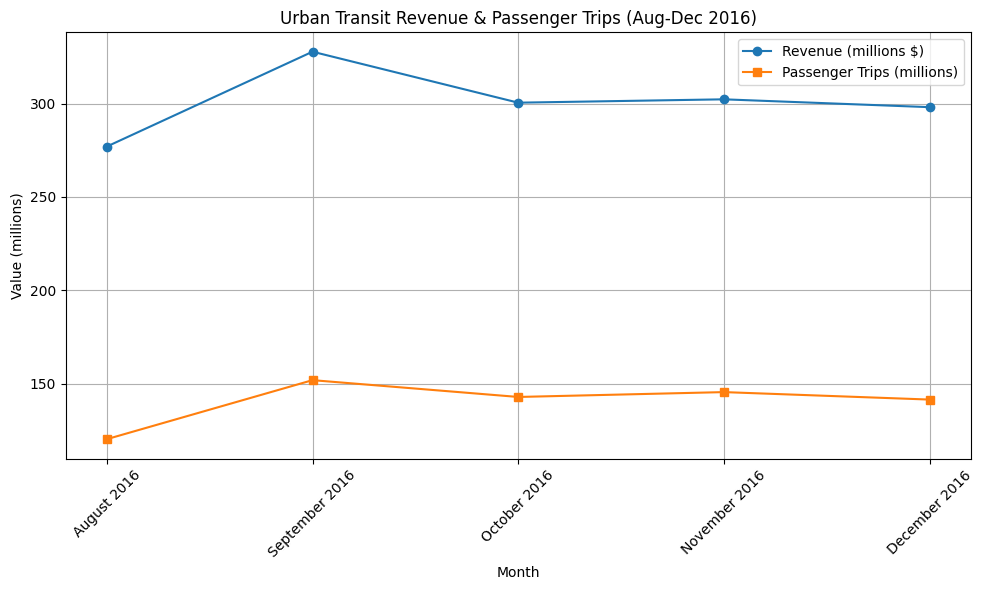

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned transit data
df_transit = pd.read_csv("cleaned_transit_data.csv", index_col=0)

# Transpose for easier plotting (months as x-axis)
df_plot = df_transit.T

# Plot
plt.figure(figsize=(10,6))
plt.plot(df_plot.index, df_plot['Total urban transit revenue, excluding subsidies (dollars)'], marker='o', label='Revenue (millions $)')
plt.plot(df_plot.index, df_plot['Total urban transit passenger trips (number)'], marker='s', label='Passenger Trips (millions)')

plt.title('Urban Transit Revenue & Passenger Trips (Aug-Dec 2016)')
plt.xlabel('Month')
plt.ylabel('Value (millions)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
corr = df_transit.corr()
print(corr)


                August 2016  September 2016  October 2016  November 2016  \
August 2016             1.0             1.0           1.0            1.0   
September 2016          1.0             1.0           1.0            1.0   
October 2016            1.0             1.0           1.0            1.0   
November 2016           1.0             1.0           1.0            1.0   
December 2016           1.0             1.0           1.0            1.0   

                December 2016  
August 2016               1.0  
September 2016            1.0  
October 2016              1.0  
November 2016             1.0  
December 2016             1.0  


In [19]:
pip install matplotlib


  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 21.7 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 17.8 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.0 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd